# 1 Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy

## 1.1 Data Pre-processing

In [2]:
# Importing and reading data.
data = pd.read_csv('Dataset.csv')
print(data)

       Unnamed: 0  instant        date  season  year month  hour weekday  \
0               0        1  2011-01-01  winter     0   Jan     0     Sat   
1               1        2  2011-01-01  winter     0   Jan     1     Sat   
2               2        3  2011-01-01  winter     0   Jan     2     Sat   
3               3        4  2011-01-01  winter     0   Jan     3     Sat   
4               4        5  2011-01-01  winter     0   Jan     4     Sat   
...           ...      ...         ...     ...   ...   ...   ...     ...   
17374       17374    17375  2012-12-31  winter     1   Dec    19     Mon   
17375       17375    17376  2012-12-31  winter     1   Dec    20     Mon   
17376       17376    17377  2012-12-31  winter     1   Dec    21     Mon   
17377       17377    17378  2012-12-31  winter     1   Dec    22     Mon   
17378       17378    17379  2012-12-31  winter     1   Dec    23     Mon   

                      weather  temperature  feeling_temperature  humidity  \
0      Cle

In [3]:
data.head()

,Unnamed: 0,instant,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
0,0,1,2011-01-01,winter,0,Jan,0,Sat,Clear or partly cloudy,3.28,3.0014,81.0,0.0,3,13,16
1,1,2,2011-01-01,winter,0,Jan,1,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,8,32,40
2,2,3,2011-01-01,winter,0,Jan,2,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,5,27,32
3,3,4,2011-01-01,winter,0,Jan,3,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,3,10,13
4,4,5,2011-01-01,winter,0,Jan,4,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,0,1,1


In [4]:
data = data.drop(columns="Unnamed: 0")
data = data.drop(columns="instant")
data = data.drop(columns="date")
data.tail()

,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
17374,winter,1,Dec,19,Mon,Mist,4.22,1.0016,60.0,11.0014,11,108,119
17375,winter,1,Dec,20,Mon,Mist,4.22,1.0016,60.0,11.0014,8,81,89
17376,winter,1,Dec,21,Mon,Clear or partly cloudy,4.22,1.0016,60.0,11.0014,7,83,90
17377,winter,1,Dec,22,Mon,Clear or partly cloudy,4.22,1.9982,56.0,8.9981,13,48,61
17378,winter,1,Dec,23,Mon,Clear or partly cloudy,4.22,1.9982,65.0,8.9981,12,37,49


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
# Checking the type of data.
data.dtypes

season                  object
year                     int64
month                   object
hour                     int64
weekday                 object
weather                 object
temperature            float64
feeling_temperature    float64
humidity               float64
windspeed              float64
Subscribed               int64
Non-subscribed           int64
Total                    int64
dtype: object

In [7]:
# Checking the distribution of the data and types of the variables.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               17379 non-null  object 
 1   year                 17379 non-null  int64  
 2   month                17379 non-null  object 
 3   hour                 17379 non-null  int64  
 4   weekday              17379 non-null  object 
 5   weather              17379 non-null  object 
 6   temperature          17379 non-null  float64
 7   feeling_temperature  17379 non-null  float64
 8   humidity             17379 non-null  float64
 9   windspeed            17379 non-null  float64
 10  Subscribed           17379 non-null  int64  
 11  Non-subscribed       17379 non-null  int64  
 12  Total                17379 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


In [8]:
data["season"].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [9]:
data["season"].replace({
    'winter':0,
    'spring':1,
    'summer':2,
    'fall':3
},inplace=True)   

In [10]:
data["weather"].unique()

array(['Clear or partly cloudy', 'Mist', 'Light rain', 'Heavy rain'],
      dtype=object)

In [11]:
data["weather"].replace({
    'Clear or partly cloudy':0,
    'Mist':1,
    'Light rain':2,
    'Heavy rain':3
},inplace=True)    

In [12]:
data["weekday"].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [13]:
data["weekday"].replace({
    'Sat':5,
    'Sun':6,
    'Mon':0,
    'Tue':1,
    'Wed':2,
    'Thu':3,
    'Fri':4
 },inplace=True)    

In [14]:
data.temperature = data.temperature.apply(lambda v:(v-data.temperature.min())/
                                          (data.temperature.max()-
                                           data.temperature.min()))

In [15]:
data.feeling_temperature = data.feeling_temperature.apply(lambda v:
                                (v-data.feeling_temperature.min())/
                                (data.feeling_temperature.max()-
                                 data.feeling_temperature.min()))

In [16]:
data.humidity = data.humidity.apply(lambda v:(v-data.humidity.min())/
                                    (data.humidity.max()-data.humidity.min()))

In [17]:
data.windspeed = data.windspeed.apply(lambda v:(v-data.windspeed.min())/
                                     (data.windspeed.max()-data.windspeed.min()))

In [18]:
data.tail()

,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
17374,0,1,Dec,19,0,1,0.244898,0.2576,0.60,0.193018,11,108,119
17375,0,1,Dec,20,0,1,0.244898,0.2576,0.60,0.193018,8,81,89
17376,0,1,Dec,21,0,0,0.244898,0.2576,0.60,0.193018,7,83,90
17377,0,1,Dec,22,0,0,0.244898,0.2727,0.56,0.157870,13,48,61
17378,0,1,Dec,23,0,0,0.244898,0.2727,0.65,0.157870,12,37,49


In [19]:
# Checking data after processing.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               17379 non-null  int64  
 1   year                 17379 non-null  int64  
 2   month                17379 non-null  object 
 3   hour                 17379 non-null  int64  
 4   weekday              17379 non-null  int64  
 5   weather              17379 non-null  int64  
 6   temperature          17379 non-null  float64
 7   feeling_temperature  17379 non-null  float64
 8   humidity             17379 non-null  float64
 9   windspeed            17379 non-null  float64
 10  Subscribed           17379 non-null  int64  
 11  Non-subscribed       17379 non-null  int64  
 12  Total                17379 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [20]:
data.describe()

,season,year,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,1.501640,0.502561,11.546752,3.011451,0.425283,0.486722,0.475775,0.627229,0.223460,35.676218,153.786869,189.463088
std,1.106918,0.500008,6.914405,2.001966,0.639357,0.196486,0.171850,0.192930,0.143811,49.305030,151.357286,181.387599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,6.000000,1.000000,0.000000,0.326531,0.333300,0.480000,0.122840,4.000000,34.000000,40.000000
50%,2.000000,1.000000,12.000000,3.000000,0.000000,0.489796,0.484800,0.630000,0.228047,17.000000,115.000000,142.000000
75%,2.000000,1.000000,18.000000,5.000000,1.000000,0.653061,0.621200,0.780000,0.298225,48.000000,220.000000,281.000000
max,3.000000,1.000000,23.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,367.000000,886.000000,977.000000


In [21]:
new_data = data

# Checking the correlation with pre-processed data file.
new_data.corr()

,season,year,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
season,1.000000,-0.010742,-0.006117,-0.007448,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
year,-0.010742,1.000000,-0.003867,0.000977,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hour,-0.006117,-0.003867,1.000000,-0.002893,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
weekday,-0.007448,0.000977,-0.002893,1.000000,-0.046424,-0.036220,-0.038918,-0.035233,0.003274,0.241964,-0.086415,-0.006338
weather,-0.014524,-0.019157,-0.020203,-0.046424,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temperature,0.312025,0.040913,0.137603,-0.036220,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
feeling_temperature,0.319380,0.039222,0.133750,-0.038918,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.150625,-0.083546,-0.276498,-0.035233,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.149773,-0.008740,0.137252,0.003274,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
Subscribed,0.120206,0.142779,0.301202,0.241964,-0.152628,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


## 1.2 Heatmap for the correlation of the data set

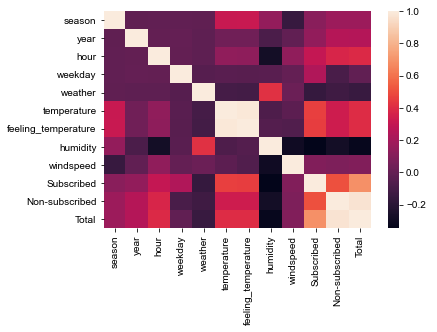

In [22]:
sns.heatmap(new_data.corr())
sns.set(rc={'figure.figsize':(14,10)})

In [23]:
# Checking correlation with 'subscribed' coloumn.
new_data.corr()["Subscribed"].sort_values(ascending=False)

Subscribed             1.000000
Total                  0.694564
Non-subscribed         0.506618
temperature            0.459616
feeling_temperature    0.454080
hour                   0.301202
weekday                0.241964
year                   0.142779
season                 0.120206
windspeed              0.090287
weather               -0.152628
humidity              -0.347028
Name: Subscribed, dtype: float64

In [24]:
# Checking correlation with 'weather' coloumn.
new_data.corr()["humidity"].sort_values(ascending=False)

humidity               1.000000
weather                0.418130
season                 0.150625
weekday               -0.035233
feeling_temperature   -0.051918
temperature           -0.069881
year                  -0.083546
Non-subscribed        -0.273933
hour                  -0.276498
windspeed             -0.290105
Total                 -0.322911
Subscribed            -0.347028
Name: humidity, dtype: float64

In [25]:
new_df = new_data

In [27]:
new_df = new_df.drop(columns=["season","year","month","hour","weekday","weather","temperature","feeling_temperature","humidity","windspeed"])

In [33]:
new_df.columns

Index(['Subscribed', 'Non-subscribed', 'Total'], dtype='object')

<AxesSubplot:>

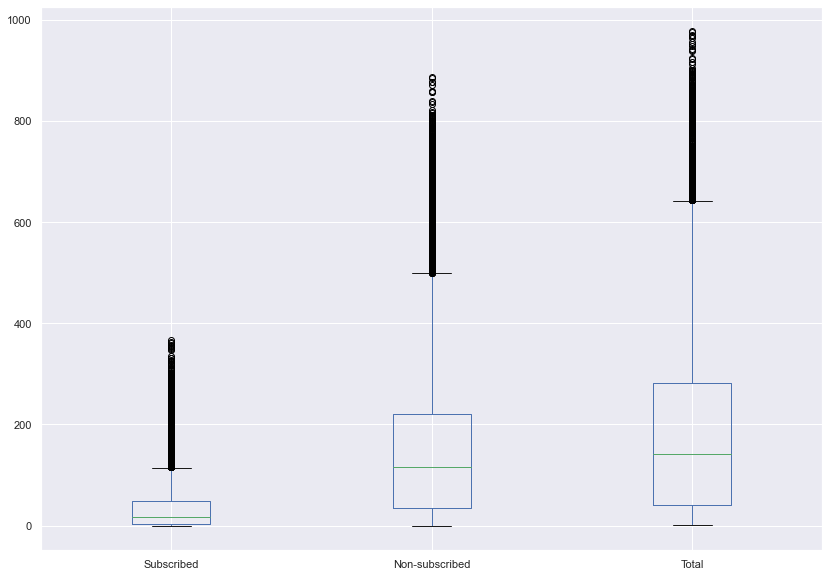

In [35]:
# Checking where most of the values lies.
new_df.plot.box()

## 1.3 Scatter matrix for the data set

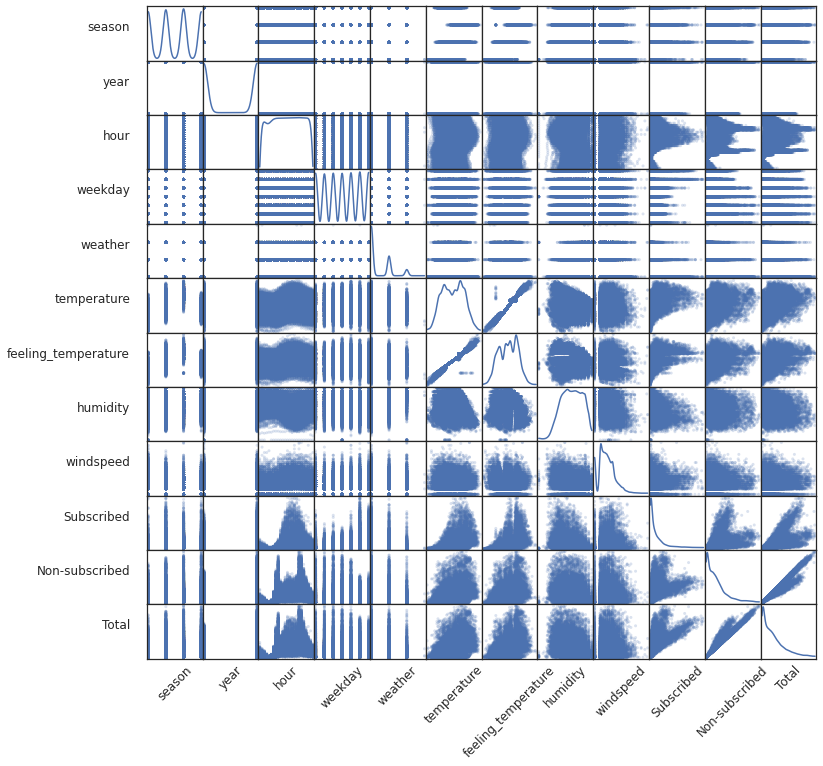

In [ ]:
sm = pd.plotting.scatter_matrix(new_data, alpha=0.2, figsize=(12,12), diagonal='kde')

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_ha('right') for s in sm.reshape(-1)]

[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

## 1.4 Box plot for temperature, windspeed and humidity outliers

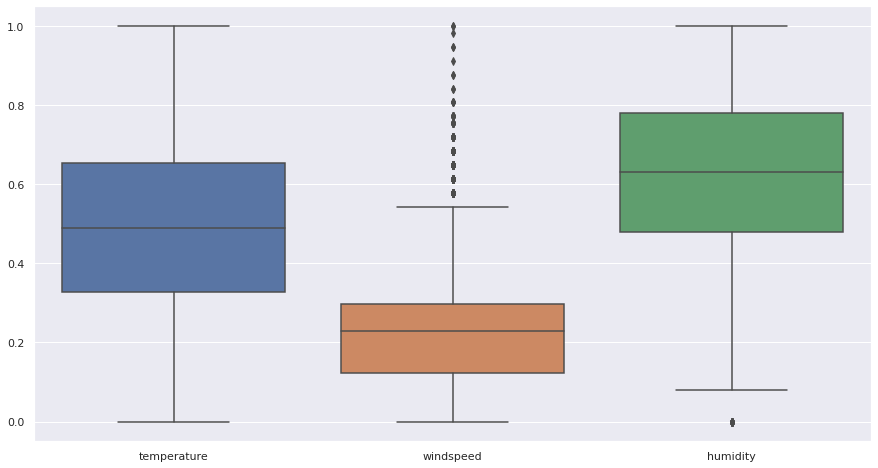

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=new_data[['temperature','windspeed','humidity']])
plt.show()

## 1.5 Bar plot for season-based monthly distribution of Subscribed

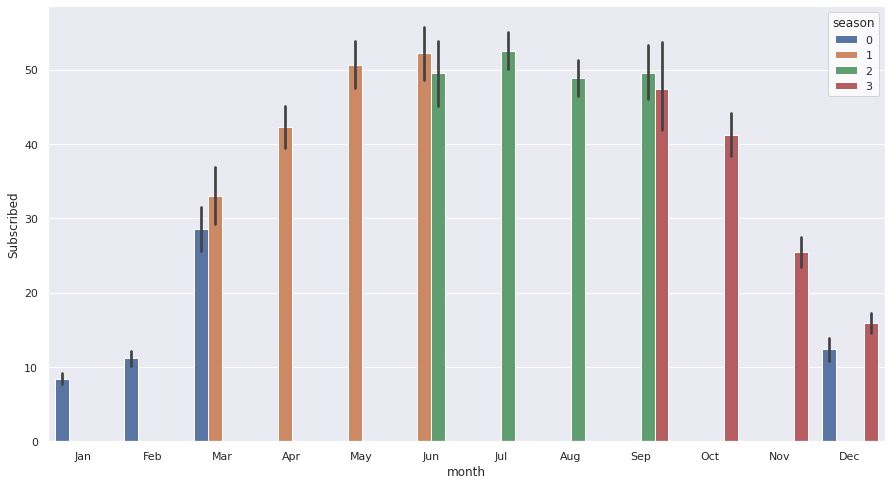

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month',y='Subscribed',
            data=new_data[['month','Subscribed','season']],hue='season',ax=ax)
plt.show()

## 1.6 Bar plot for weekday-based monthly distribution of Subscribed

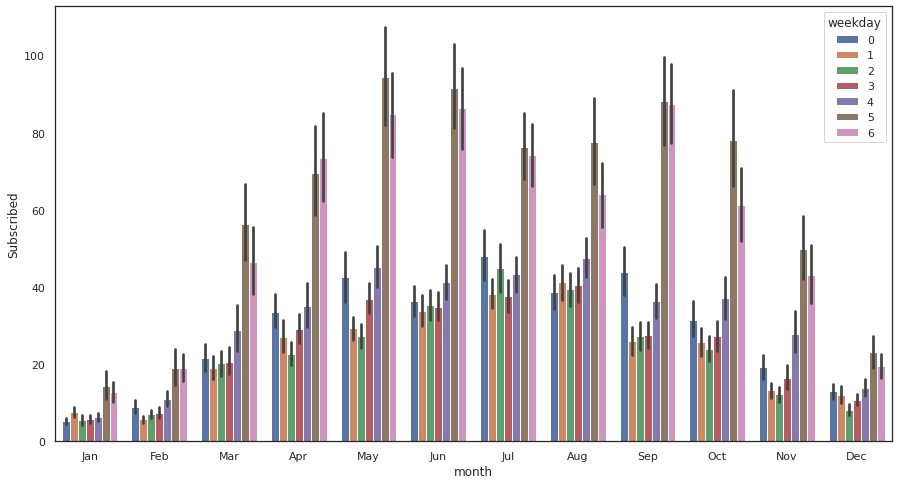

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='Subscribed',
            data=new_data[['month','Subscribed','weekday']],hue='weekday',ax=ax1)
plt.show()

## 1.7 Violin plot for yearly distribution of Subscribed

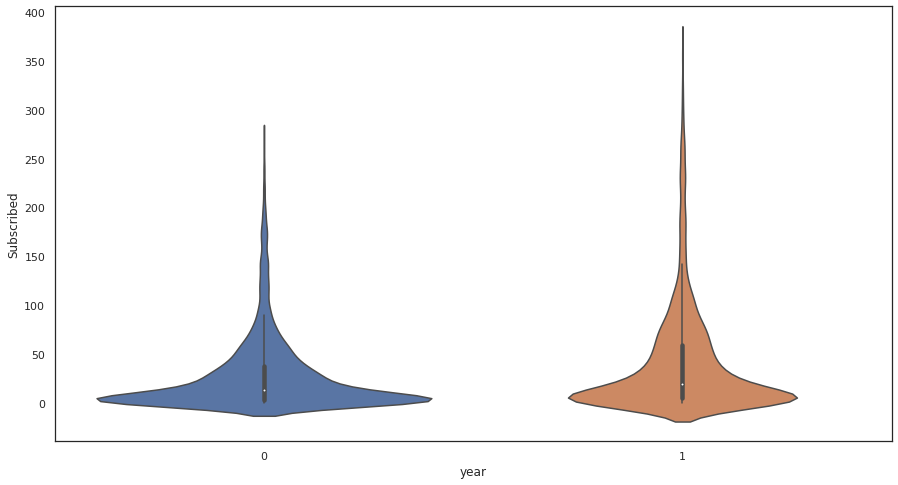

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='Subscribed',data=new_data[['year','Subscribed']])
plt.show()

## 1.8 Bar plot for weekday distribution of Subscribed

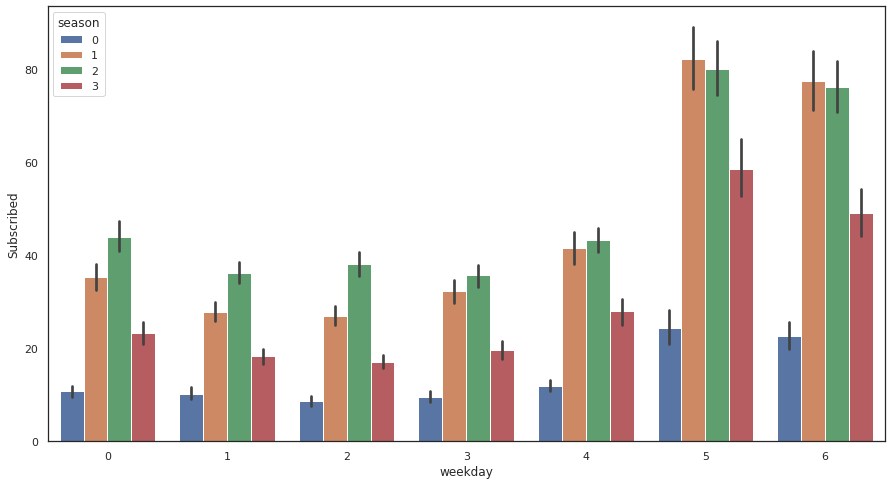

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=new_data,x='weekday',y='Subscribed',hue='season')
plt.show()

## 1.9 Bar plot for weather_condition distribution of Non-subscribed

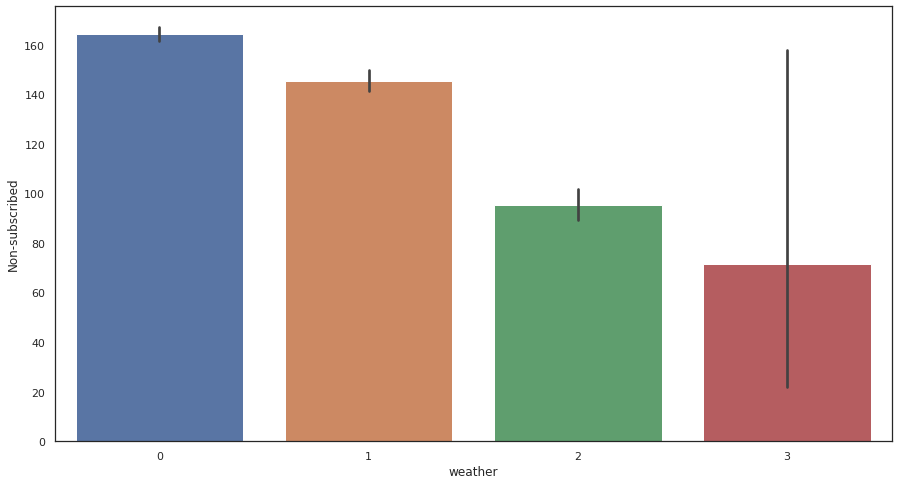

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='weather',y='Non-subscribed',
            data=new_data[['month','Non-subscribed','weather']],ax=ax1)
plt.show()

## 1.10 Bar plot for weather_condition distribution of Subscribed

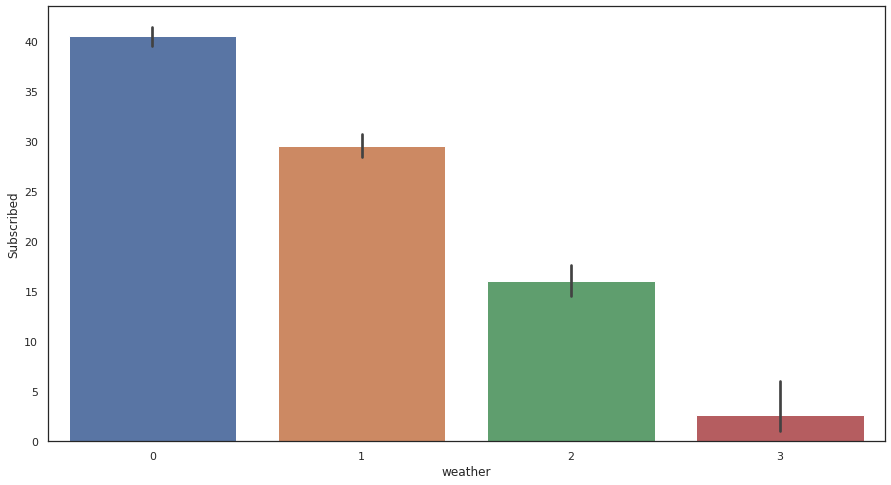

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='weather',y='Subscribed',
            data=new_data[['month','Subscribed','weather']],ax=ax1)
plt.show()

# 2 Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

## 2.1 Data Pre-processing

In [ ]:
# Read the data set into a data frame.
df = pd.read_csv("Dataset.csv")
df.head()

,Unnamed: 0,instant,date,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Subscribed,Non-subscribed,Total
0,0,1,2011-01-01,winter,0,Jan,0,Sat,Clear or partly cloudy,3.28,3.0014,81.0,0.0,3,13,16
1,1,2,2011-01-01,winter,0,Jan,1,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,8,32,40
2,2,3,2011-01-01,winter,0,Jan,2,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,5,27,32
3,3,4,2011-01-01,winter,0,Jan,3,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,3,10,13
4,4,5,2011-01-01,winter,0,Jan,4,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,0,1,1


In [ ]:
# Drop attributes that might overfit the model.
df = df.drop(columns=["Unnamed: 0", "date", "instant", "year", "Subscribed", "Non-subscribed"])
df.head()

,season,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed,Total
0,winter,Jan,0,Sat,Clear or partly cloudy,3.28,3.0014,81.0,0.0,16
1,winter,Jan,1,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,40
2,winter,Jan,2,Sat,Clear or partly cloudy,2.34,1.9982,80.0,0.0,32
3,winter,Jan,3,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,13
4,winter,Jan,4,Sat,Clear or partly cloudy,3.28,3.0014,75.0,0.0,1


In [ ]:
# Transform the categorical attributes to binary attributes using 
# one-hot-encoding metric.
df2 = df[["season", "month", "weekday", "weather"]]
df2 = pd.get_dummies(data=df2, drop_first=True)
df2.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Heavy rain,weather_Light rain,weather_Mist
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Drop the original categorical attributes and add the transformed 'categorical'
# attributes to the data frame.
df = df.drop(columns=["season", "month", "weekday", "weather"])
df = pd.concat([df, df2], axis=1)
df.head()

,hour,temperature,feeling_temperature,humidity,windspeed,Total,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Heavy rain,weather_Light rain,weather_Mist
0,0,3.28,3.0014,81.0,0.0,16,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,2.34,1.9982,80.0,0.0,40,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,2.34,1.9982,80.0,0.0,32,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3,3.28,3.0014,75.0,0.0,13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,3.28,3.0014,75.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 2.2 Performance of the model on the test set using different training size

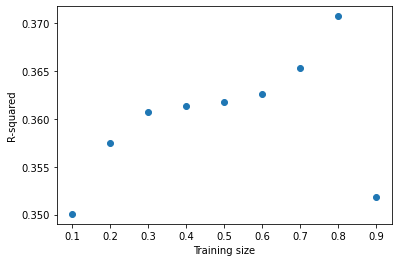

In [ ]:
# Dictionary to store the R-squared performance of each training size.
performance = {}
# Target attribute.
y = df['Total'].values
# Features.
X = df.drop(['Total'], axis=1).values

# For each training size, train the model on the training set and evaluate
# the peformance of the model on the test set using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, 
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

# Plot the R-squared performances of each training size in one plot.
plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

## 2.3 Experiment with different transformations of the target

### 2.3.1 Transformation 1: MinMaxScaler()

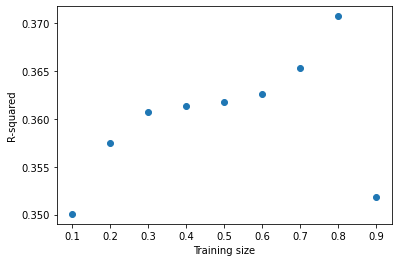

In [ ]:
# Standardization of the target by scaling the target into the range (0, 1).

# Dictionary to store the R-squared performance of each training size.
performance = {}

# Tranformation of the target.
transformer = MinMaxScaler()
y_trans = y.reshape(-1, 1)
transformer.fit(y_trans)
y_trans = transformer.transform(y_trans)

# For each training size split the data into training data and test data.
# Fit the training data to the LinearRegressor() model.
# Use the trained model to predict the target of the test data.
# Preformance of model on the test data is compared using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y_trans, train_size=size, 
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

# Plot the performances of each training size in one plot.
plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

### 2.3.2 Transformation 2: PowerTransformer()

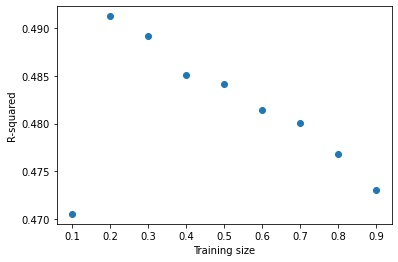

In [ ]:
# Mapping the target to a Gaussian distribution in order to stabilize variance
# and minimize skewness.

# Dictionary to store the R-squared performance of each training size.
performance = {}

# Transformation of the target.
transformer = PowerTransformer()
y_trans = y.reshape(-1, 1)
transformer.fit(y_trans)
y_trans = transformer.transform(y_trans)

# For each training size split the data into training data and test data.
# Fit the training data to the LinearRegressor() model.
# Use the trained model to predict the target of the test data.
# Preformance of model on the test data is compared using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=size, 
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

### 2.3.3 Transformation 3: QuartileTransformer()

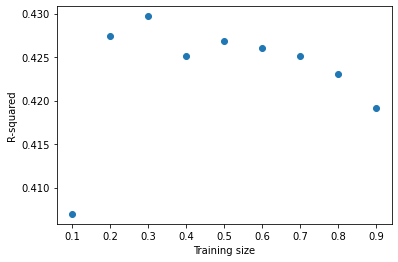

In [ ]:
# QuantileTransformer provides a non-parametric transformation to map the data 
# to a uniform distribution with values between 0 and 1.

# Dictionary to store the R-squared performance of each training size.
performance = {}

# Transformation of the target.
transformer = QuantileTransformer(output_distribution='normal')
y_trans = y.reshape(-1, 1)
transformer.fit(y_trans)
y_trans = transformer.transform(y_trans)

# For each training size split the data into training data and test data.
# Fit the training data to the LinearRegressor() model.
# Use the trained model to predict the target of the test data.
# Preformance of model on the test data is compared using R-squared metric.
for size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=size, 
                                                      random_state=0)
  model = LinearRegression()
  reg = model.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  performance[size] = r2_score(y_test, y_pred)

plt.scatter(list(performance.keys()), list(performance.values()))
plt.xlabel("Training size")
plt.ylabel("R-squared")
plt.show()

# 3 Decision Tree Regression

## 3.1 Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# from fancyimpute import KNN
# import scipy
from scipy import stats
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
# Load data.
bike_rent_df = pd.read_csv('Dataset.csv')

In [ ]:
bike_rent_df.shape

(17379, 16)

In [ ]:
# Missing value analysis.
bike_rent_df.isnull().sum()

Unnamed: 0             0
instant                0
date                   0
season                 0
year                   0
month                  0
hour                   0
weekday                0
weather                0
temperature            0
feeling_temperature    0
humidity               0
windspeed              0
Subscribed             0
Non-subscribed         0
Total                  0
dtype: int64

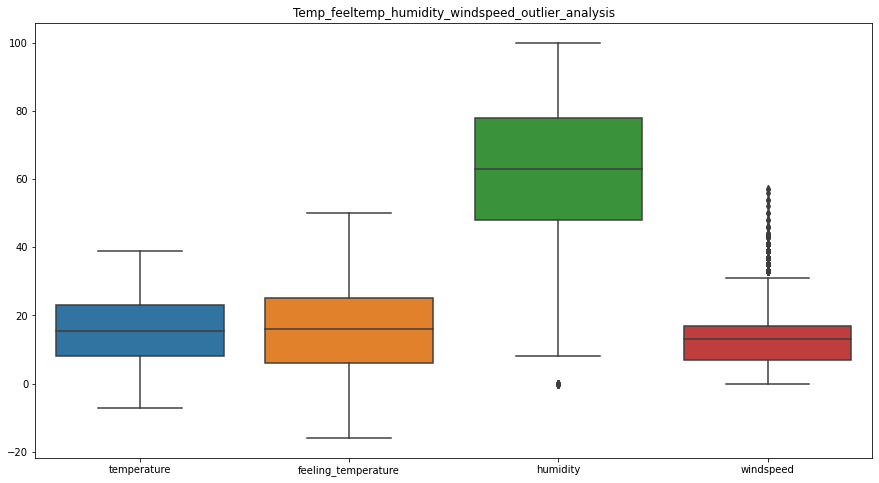

In [ ]:
# Outlier analysis.
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data = bike_rent_df[['temperature','feeling_temperature','humidity','windspeed']])
ax.set_title("Temp_feeltemp_humidity_windspeed_outlier_analysis")
plt.show()

In [ ]:
# Outliers Replacement.
col_name = ['humidity','windspeed']
outlier_df = pd.DataFrame(bike_rent_df, columns=(col_name))

for c in col_name:
  # 75%.
  per_75 = np.percentile(outlier_df.loc[:,c],75)
  # 25%.
  per_25 = np.percentile(outlier_df.loc[:,c],25)
  # Range.
  range_per = per_75 - per_25 
  min_per = per_75 - (range_per * 1.5) 
  max_per = per_25 + (range_per * 1.5) 
  # Outlier -> NAN.
  outlier_df.loc[outlier_df.loc[:,c]<min_per, :c] = np.nan 
  outlier_df.loc[outlier_df.loc[:,c]>max_per, :c] = np.nan
  # Replace outliers with the mean.
  outlier_df['humidity'] = outlier_df['humidity'].fillna(outlier_df['humidity'].mean())
  outlier_df['windspeed'] = outlier_df['windspeed'].fillna(outlier_df['windspeed'].mean())

In [ ]:
# Replace the original data with data that removes outlier.
bike_rent_df['windspeed'] = bike_rent_df['windspeed'].replace(outlier_df['windspeed'])
bike_rent_df['humidity'] = bike_rent_df['humidity'].replace(outlier_df['humidity'])

In [ ]:
# Split the dataset with ratio 7:3.
# For Subscribed.
X_train_Sub, X_test_Sub, Y_train_Sub, Y_test_Sub = train_test_split(bike_rent_df.iloc[:,0:-3], bike_rent_df.iloc[:,-3],test_size=0.3,random_state=4)
# For non-Subscribed.
X_train_no, X_test_no, Y_train_no, Y_test_no = train_test_split(bike_rent_df.iloc[:,0:-3], bike_rent_df.iloc[:,-2],test_size=0.3,random_state=4)

In [ ]:
print(X_train_Sub.shape, X_test_Sub.shape, Y_train_Sub.shape, Y_test_Sub.shape)

(12165, 13) (5214, 13) (12165,) (5214,)


In [ ]:
# Drop unrelated column.
train_x_Sub_clean = X_train_Sub[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
train_x_no_clean = X_train_no[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
test_x_Sub_clean = X_test_Sub[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
test_x_no_clean = X_test_no[['season', 'year', 'month', 'hour', 'weekday', 'weather', 'temperature', 'feeling_temperature','humidity','windspeed']]
train_x_Sub_clean.head(1)

,season,year,month,hour,weekday,weather,temperature,feeling_temperature,humidity,windspeed
13590,summer,1,Jul,11,Wed,Clear or partly cloudy,27.72,28.0022,81.0,12.228966


In [ ]:
# One-hot-encoding categorical features.
cat_features = ['season', 'year', 'month', 'hour', 'weekday', 'weather']
# Subscribed.
train_x_sub = pd.get_dummies(train_x_Sub_clean, columns=cat_features)
train_y_sub = Y_train_Sub.values
test_x_sub = pd.get_dummies(test_x_Sub_clean, columns=cat_features)
test_y_sub = Y_test_Sub.values
# Non-subscribed.
train_x_nosub = pd.get_dummies(train_x_no_clean, columns=cat_features)
train_y_nosub = Y_train_no.values
test_x_nosub = pd.get_dummies(test_x_no_clean, columns=cat_features)
test_y_nosub = Y_test_no.values
train_x_sub.shape

(12165, 57)

In [ ]:
train_x_sub.head(3)

,temperature,feeling_temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,year_0,year_1,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Clear or partly cloudy,weather_Heavy rain,weather_Light rain,weather_Mist
13590,27.72,28.0022,81.000000,12.228966,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1823,17.38,18.0032,63.713304,16.997900,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
14404,24.90,28.0022,51.000000,11.001400,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## 3.2 Build Regression Decision Tree For Subscribed and Find the Most Impact Parameter

In [ ]:
# Baseline.
DTR_base = DecisionTreeRegressor(random_state=4)
DTR_base.fit(train_x_sub, train_y_sub)
print("Tree depth: ", DTR_base.tree_.max_depth)
DTR_pred = DTR_base.predict(test_x_sub)
baseline_rmse = math.sqrt(metrics.mean_squared_error(test_y_sub, DTR_pred))
print("baseline RMSE:", baseline_rmse)

Tree depth:  46
baseline RMSE: 30.655284240410754


In [ ]:
# Set hyperparametric domain.
criterions = ['mse','mae']
splitters = ['best','random']
max_features_sub = list(range(1,train_x_sub.shape[1]))
max_features_nosub = list(range(1,train_x_nosub.shape[1]))
max_depths = np.linspace(10, 100, 10, endpoint=True) 
min_samples_splits = list(range(2,20))  
min_samples_leafs = list(range(1,10)) 
min_weight_fraction_leafs = np.linspace(0, 0.5, 6, endpoint=True) 
max_leaf_nodess = list(range(50,1000,50))
min_impurity_splits = np.linspace(0.1, 1, 10, endpoint=True)

In [ ]:
def best_para(DTR, train_x, train_y, test_x, test_y):
  DTR.fit(train_x, train_y)
  DTR_pred = DTR.predict(test_x)
  rmse = math.sqrt(metrics.mean_squared_error(test_y, DTR_pred))
  return rmse

def find_index(paralist, rmselist):
  min_val = min(rmselist)
  max_val = max(rmselist)
  rmse_range = max_val - min_val
  index_min = rmselist.index(min_val)
  para_val = paralist[index_min]
  print(rmselist)
  print("best paramter is: "+ str(para_val) +" with rmse = "+ str(min_val))
  print("the range of RMSE: ", rmse_range)

#### Parameter: criterion

In [ ]:
# criterions = ['mse','mae']
best_criterions = []
for c in criterions:
  DTR = DecisionTreeRegressor(criterion = c, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_criterions.append(rmse)
find_index(criterions, best_criterions) 

[30.655284240410754, 28.677870610526917]
best paramter is: mae with rmse = 28.677870610526917
the range of RMSE:  1.9774136298838378


#### Parameter: splitter

In [ ]:
# splitters = ['best','random']
best_splitters = []
for s in splitters:
  DTR = DecisionTreeRegressor(splitter = s, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_splitters.append(rmse)
find_index(splitters, best_splitters)

[30.655284240410754, 27.001218202639375]
best paramter is: random with rmse = 27.001218202639375
the range of RMSE:  3.654066037771379


#### Parameter: max_future

In [ ]:
# max_features_sub = list(range(1,train_x_sub.shape[1]))
best_max_features_sub = []
for mb in max_features_sub:
  DTR = DecisionTreeRegressor(max_features= mb, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_max_features_sub.append(rmse)
find_index(max_features_sub, best_max_features_sub)

[39.565491002271955, 38.71317000749425, 37.97104109241322, 39.70882827967656, 35.2247299155265, 38.18368832981877, 35.80102601534541, 32.16010931848743, 34.82645684360165, 31.7462307745784, 34.51056914094455, 33.957260079147346, 33.174886171577484, 31.65838524543368, 32.30928522539593, 32.18600941632968, 30.09279855282791, 28.73487410842182, 30.54701238218822, 28.88758750621832, 30.793222077136225, 29.52605180081449, 30.591995770409035, 29.62001391619959, 30.9286341197851, 31.614122215188907, 29.890549608329284, 29.886959386805632, 31.256790593237334, 27.926904013496667, 30.651007701393038, 30.547582156434945, 30.734453565665582, 30.327999326580205, 29.46071675962406, 33.2210806486331, 29.87495114934384, 32.771024049626824, 29.658939055527615, 30.561215897705136, 29.43790640852226, 30.22729075276839, 30.02999794796681, 28.930451768145865, 30.964790161827587, 29.492098114069933, 30.639088431788487, 30.5272936855231, 30.063342539273282, 31.842574627060838, 29.665876863762104, 31.19062983

#### Parameter: max_depth

In [ ]:
# max_depths = np.linspace(10, 100, 10, endpoint=True)
best_max_depth = []
for md in max_depths:
  DTR = DecisionTreeRegressor(max_depth = md, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_max_depth.append(rmse)
find_index(max_depths, best_max_depth)

[32.604197247803064, 30.26322276976348, 30.584050060851897, 30.378001700404965, 30.655284240410754, 30.655284240410754, 30.655284240410754, 30.655284240410754, 30.655284240410754, 30.655284240410754]
best paramter is: 20.0 with rmse = 30.26322276976348
the range of RMSE:  2.340974478039584


#### Parameter: min_samples_split

In [ ]:
# min_samples_splits = list(range(2,20))
best_min_samples_split = []
for mss in min_samples_splits:
  DTR = DecisionTreeRegressor(min_samples_split = mss, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_samples_split.append(rmse)
find_index(min_samples_splits, best_min_samples_split)

[30.655284240410754, 30.746543273731888, 29.855424372947198, 30.17654190649749, 29.75446627711625, 29.533454712535477, 29.474728091729162, 28.45334657595152, 27.93307399560042, 27.904094175679916, 27.673753147168078, 27.483699002036822, 27.522110398423298, 27.51163509875203, 27.58137741449049, 27.425961950928077, 27.65529771566595, 27.693488777477828]
best paramter is: 17 with rmse = 27.425961950928077
the range of RMSE:  3.320581322803811


#### Parameter: min_samples_leaf

In [ ]:
# min_samples_leafs = list(range(1,10))
best_min_samples_leaf = []
for msl in min_samples_leafs:
  DTR = DecisionTreeRegressor(min_samples_leaf = msl, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_samples_leaf.append(rmse)
find_index(min_samples_leafs, best_min_samples_leaf)

[30.655284240410754, 29.40821264648396, 27.77067123741216, 26.926489091185644, 26.510421871856753, 26.727981856054598, 26.816375583502722, 27.110222313266778, 27.030298695473952]
best paramter is: 5 with rmse = 26.510421871856753
the range of RMSE:  4.144862368554001


#### Parameter: min_weight_fraction_leaf

In [ ]:
# min_weight_fraction_leafs = np.linspace(0, 0.5, 6, endpoint=True)
best_min_weight_fraction_leafs = []
for bmw in min_weight_fraction_leafs:
  DTR = DecisionTreeRegressor(min_weight_fraction_leaf = bmw, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_weight_fraction_leafs.append(rmse)
find_index(min_weight_fraction_leafs, best_min_weight_fraction_leafs)

[30.655284240410754, 41.98034784862461, 42.82241660913512, 43.252664678960215, 45.36699249012264, 49.09931912342388]
best paramter is: 0.0 with rmse = 30.655284240410754
the range of RMSE:  18.444034883013128


####Parameter: max_leaf_nodes

In [ ]:
# max_leaf_nodess = list(range(50,1000,50))
best_max_leaf_nodess = []
for mln in max_leaf_nodess:
  DTR = DecisionTreeRegressor(max_leaf_nodes = mln,random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_max_leaf_nodess.append(rmse)
find_index(max_leaf_nodess, best_max_leaf_nodess)

[31.958501220901802, 30.31983750649112, 29.909912355691517, 29.13907884698948, 29.221941078932925, 29.2747558563752, 29.377243423113388, 29.403516927634765, 29.24358437827414, 29.25865941657914, 29.306181166343062, 29.43307784533855, 29.507181344397686, 29.495202317155698, 29.67534404380201, 29.656200372972545, 29.685894508399038, 29.74553596001204, 29.72311121620464]
best paramter is: 200 with rmse = 29.13907884698948
the range of RMSE:  2.819422373912321


####Parameter: min_impurity_split

In [ ]:
# min_impurity_splits = np.linspace(0.1, 1, 10, endpoint=True)
best_min_impurity_splits = []
for mis in min_impurity_splits:
  DTR = DecisionTreeRegressor(min_impurity_split = mis, random_state=4)
  rmse = best_para(DTR, train_x_sub, train_y_sub, test_x_sub, test_y_sub)
  best_min_impurity_splits.append(rmse)
find_index(min_impurity_splits, best_min_impurity_splits)

[30.88995475057325, 30.825128450454343, 31.059331548934214, 30.98793990913607, 30.44224941590898, 30.549724617194194, 30.50637253266058, 30.58510988317756, 31.071421290743324, 30.598686213155844]
best paramter is: 0.5 with rmse = 30.44224941590898
the range of RMSE:  0.6291718748343449


####The parameter which has the most impact on the test performance is : *min_samples_leaf*

In [ ]:
# for train set
train_best_min_samples_leafs = []
for t in min_samples_leafs:
  DTR_sam = DecisionTreeRegressor(min_samples_leaf = t)
  DTR_sam.fit(train_x_sub, train_y_sub)
  DTR_sam_pred_train = DTR_sam.predict(train_x_sub)
  sam_rmse_train = math.sqrt(metrics.mean_squared_error(train_y_sub, DTR_sam_pred_train))
  train_best_min_samples_leafs.append(sam_rmse_train)
train_best_min_samples_leafs

[0.08260055959580713,
 9.676760182439278,
 13.352637638627082,
 16.004258394914213,
 17.773142576426807,
 19.226050281391654,
 20.191931908329128,
 20.917888838535735,
 21.727295005104843]

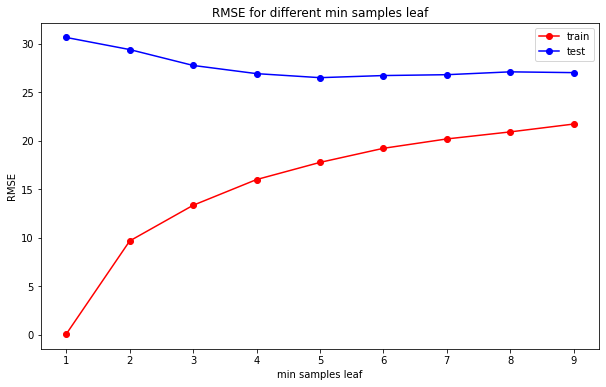

In [ ]:
# plot 
x_min_sample = min_samples_leafs
y_train_sample = train_best_min_samples_leafs
y_test_sample = best_min_samples_leaf

plt.subplots(figsize=(10,6))
plt.plot(x_min_sample, y_train_sample, 'ro-', label = 'train')
plt.plot(x_min_sample, y_test_sample, 'bo-', label = 'test')
plt.legend()
plt.xlabel("min samples leaf")
plt.ylabel("RMSE")
plt.title("RMSE for different min samples leaf")
plt.show()

## 3.3 Build Regression Decision Tree For Non-Subscribed using the paramters of Subscribed

In [ ]:
Nonsub_best_min_samples_leafs = []
for t in min_samples_leafs:
  DTR_sam = DecisionTreeRegressor(min_samples_leaf = t, random_state=4)
  DTR_sam.fit(train_x_nosub, train_y_nosub)
  DTR_sam_pred = DTR_sam.predict(test_x_nosub)
  sam_rmse = math.sqrt(metrics.mean_squared_error(test_y_nosub, DTR_sam_pred))
  Nonsub_best_min_samples_leafs.append(sam_rmse)
Nonsub_best_min_samples_leafs

[58.82132124287892,
 56.769695584378084,
 54.972575727526674,
 55.306445976932096,
 55.796988729341535,
 57.3742209254061,
 57.618244862707215,
 57.65380890513034,
 58.8563860316985]